<a href="https://colab.research.google.com/github/chohu-boraaaa/ADsP/blob/main/5-2-1.%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5%3A%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80%2CKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. 지도학습

### 1. 지도학습, 예측, 분류
- 데이터마이닝의 지도학습은 목표변수가 있는 경우 사용하는 방법으로 예측과 분류기법으로 나뉘어짐

#### 1-1. 예측
- 예측기법 종류 : 회귀분석, 선형모형, 비선형모형
- 분류기법 종류 : 의사결정나무, 서포트벡터머신, 판별분석, 로지스틱 회귀분석
- 예측 : 기존 데이터 및 미래 상황에 대한 가정을 활용해서 분석하는 것으로 고객의 구매활동 등을 예측

#### 1-2. 분류
- 분류기법 종류 : 의사결정나무, 서포트벡터머신, 판별분석, 로지스틱 회귀분석
- 분류 : 다수의 객체를 그룹화하는 것으로 학습데이터를 사용해서 오분류율을 최소화하는 분류규칙 생성, 표본으로부터 학습데이터와 검증데이터를 랜덤 샘플링을 통해서 수행
- 학습데이터는 분류알고리즘(ex. 의사결정나무)을 사용해서 분류모형을 만들고 검증 데이터로부터 분류모형의 타당성을 확인해야 함
- 분류모형은 새로운 실제 데이터가 입력 되었을 때 오분류율을 최소화할 수 있도록 해야 함

### 2. 다중회귀분석

#### 2-1. 다중회귀분석 방법

k개의 독립변수 X1~Xk가 종속변수 Y를 종속하는 경우 다중 회귀분석 사용

![다중회귀](https://lh3.googleusercontent.com/proxy/rmdF2VHW8t7Jyq5iIQK9CIgTVvOUCJceE8ACb1zDlYcj0-DuK5jVk4GHhjDK-bvs4mBKQppTs20dedAF6Q)

출처 : http://jangun.com/study/RegressionAnalysis.html

- 회귀계수 βk는 다른 독립변수가 일정한 경우 Xk의 평균변화량



In [3]:
car <- read.csv("auto-mpg.csv")

In [4]:
attach(car)

In [5]:
dim(car)
# 관측치 398개와 총 9개의 변수가 있음

[1] 398   9

In [6]:
head(car)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin,car.name
,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [7]:
# 다중회귀모형 상관계수 분석
r <- lm(mpg ~ displacement + weight + acceleration, data=car)
summary(r)


Call:
lm(formula = mpg ~ displacement + weight + acceleration, data = car)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.7382  -2.8112  -0.3607   2.5231  16.1845 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.2990756  1.8614975  22.186  < 2e-16 ***
displacement -0.0108953  0.0065036  -1.675   0.0947 .  
weight       -0.0061889  0.0007396  -8.368 1.03e-15 ***
acceleration  0.1738507  0.0975107   1.783   0.0754 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.294 on 394 degrees of freedom
Multiple R-squared:  0.7004,	Adjusted R-squared:  0.6981 
F-statistic:   307 on 3 and 394 DF,  p-value: < 2.2e-16


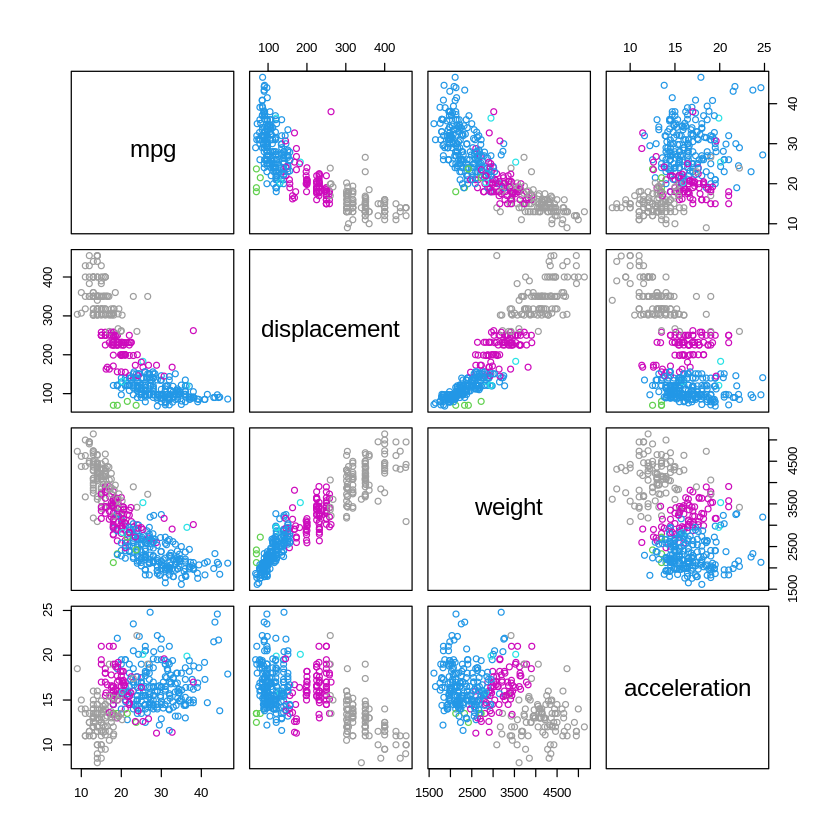

In [8]:
# 변수 간의 관계 가시화
vartest <- c("mpg", "displacement", "weight", "acceleration")
pairs(car[vartest], cex=1, col=as.integer(car$cylinders))

* displacement가 증가하면 mpg는 감소하는 관계
* weight가 증가하면 mpg는 감소하는 관계
* accleration과 mpg 간에는 강한 양의 상관관계나 음의 상관관계가 보이지 않음

#### 2-2. 다중 회귀분석 변수 선택 방법

##### ▶ 변수선택
- 전진선택법 : 독립변수 중에서 종속변수에 영향이 가장 큰 변수부터 모형에 포함시키는 방법
- 후진제거법 : 독립변수를 모두 포함시켜 모형을 만들고 가장 영향이 적은 변수부터 제거하는 방법
- 단계별 방법 : 전진 선택법에 의해 변수를 추가. 변수가 추가되고 중요도가 유의수준에 포함되지 않으면 추가한 변수가 제거됨

In [9]:
# stepwise method
step(r, direction="both")

Start:  AIC=1164.01
mpg ~ displacement + weight + acceleration

               Df Sum of Sq    RSS    AIC
<none>                      7266.2 1164.0
- displacement  1     51.76 7318.0 1164.8
- acceleration  1     58.62 7324.8 1165.2
- weight        1   1291.30 8557.5 1227.1



Call:
lm(formula = mpg ~ displacement + weight + acceleration, data = car)

Coefficients:
 (Intercept)  displacement        weight  acceleration  
   41.299076     -0.010895     -0.006189      0.173851  


단계별방법으로 변수 선택 결과 displacement, weight, acceleration 모두 선택되었다.

### 3. K-인접기법
- KNN은 분류 및 예측 방법중에서 Instance-based Learning으로 모델을 생성하지 않고 데이터를 분류하거나 예측할 때 사용하는 방법
- 학습데이터의 패턴을 분석하여 데이터를 분류하고 예측
- K에서 가장 가까운 이웃들을 사용해 분류하는 방법이고 비선형 모델
- KNN은 범주형 데이터를 분류할 수도 있고 연속형 데이터로 예측할 수도 있음
- K값을 변경할 때마다 분류가 변경되므로 적정한 K값을 지정하기 위해 Cross-Validation 및 부트스트랩 방법이 있음

#### 3-1. K-인접기법의 특징
- Instance-based Learning : 각각의 인스턴스(관측치)를 사용해서 새로운 데이터를 예측할 수 있음
- Memory-based Learning : 모든 학습 데이터를 메모리에 저장하고 예측
- Lazy Learning : 모델을 만들지 않고 테스트 데이터로 작동하는 알고리즘

#### 3-2. 1-인접기법
- 새로운 데이터가 주어지면 가장 가까운 이웃하나를 정의하는 것
- 3-인접기법이라면 가장 가까운 3개의 노드를 정의하는 방법

#### 3-3. K-인접기법
![k-인접기법1](https://blog.kakaocdn.net/dn/bGjrlQ/btq1I6M0JkJ/QezQo5EQk9Uojbl8zAlOX1/img.png)

출처 : https://dbstndi6316.tistory.com/253

- k값에 따라 군집이 변경
- 거리 값이 적은 쪽으로 데이터를 분류하고 새로운 데이터가 왔을 때 어떤 분류에 속하는지 분석하는 방법으로 분류에 속한 값들과 새로운 데이터 간에 거리 값을 계산하여 가장 가까운 거리 값을 가지는 분류에 속하게 됨

![k인접기법2](https://t1.daumcdn.net/cfile/tistory/234A484058C7912C27)

출처 : https://kkokkilkon.tistory.com/14

- 별은 거리 값이 가장 가까운 군집에 분류 됨
- 유클리드의 거리 값 : 거리 값을 계산하는 방법 중 가장 많이 사용 됨

![유클리드](https://t1.daumcdn.net/cfile/tistory/193191184A31C8D14D)

출처 : https://uiandwe.tistory.com/96

In [10]:
# KNN 관련 패키지 설치
# "class" : KNN 수행
install.packages("class")
# "gmodels" : cross table을 위한 패키지
install.packages("gmodels")
# "scales" : 최적 K를 그래프로 표현
install.packages("scales")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
library(class)
library(gmodels)
library(scales)

In [13]:
iris
summary(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

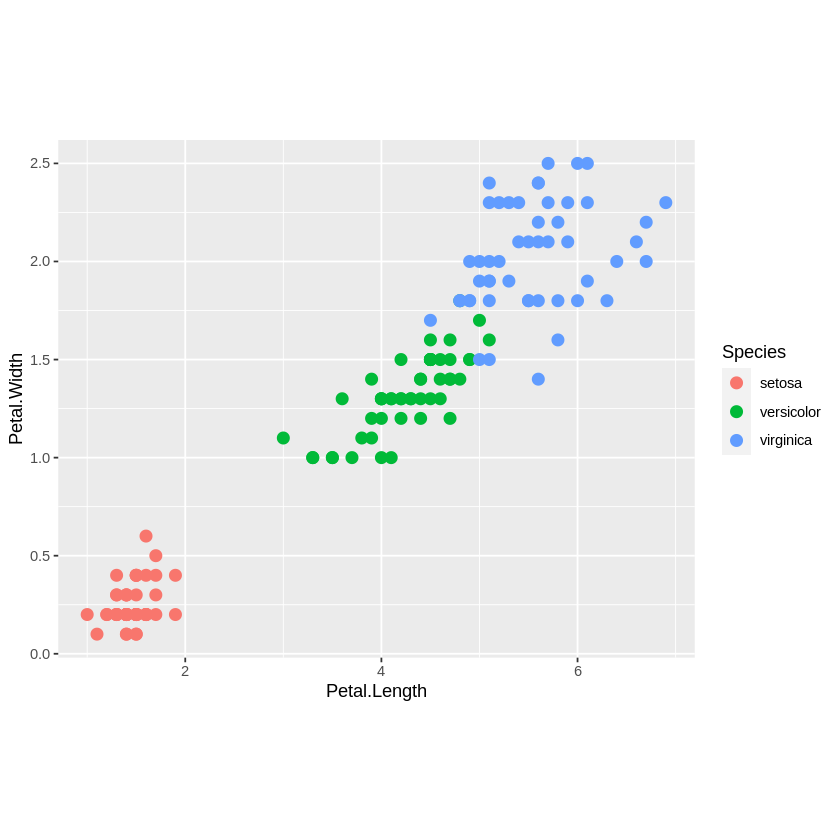

In [29]:
library(dplyr)
library(ggplot2)
iris%>%
    ggplot(aes(x = Petal.Length, y = Petal.Width, colour = Species))+
    geom_point(size = 3)+
    coord_fixed(ratio = 2)

setosa : 빨강, versicolor : 초록, virginica : 파랑

이 꽃들은 꽃잎 너비와 길이 사이에 높은 상관관계 있다는 것도 알 수 있음

In [31]:
# 데이터 정규화
# 정규화 함수
min_max_normalizer <- function(x) {
num <- x - min(x)
denom <- max(x) - min(x)
return (num/denom)
}
# Iris 데이터 세트 정규화
normalized_iris <- as.data.frame(lapply(iris[1:4], min_max_normalizer))
# 정규화된 데이터 보기
summary(normalized_iris)

  Sepal.Length     Sepal.Width      Petal.Length     Petal.Width     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2222   1st Qu.:0.3333   1st Qu.:0.1017   1st Qu.:0.08333  
 Median :0.4167   Median :0.4167   Median :0.5678   Median :0.50000  
 Mean   :0.4287   Mean   :0.4406   Mean   :0.4675   Mean   :0.45806  
 3rd Qu.:0.5833   3rd Qu.:0.5417   3rd Qu.:0.6949   3rd Qu.:0.70833  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  

In [32]:
# 데이터 구성요소 확인
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

In [34]:
# 랜덤을 위한 시드 값 세트
set.seed(1234)

In [35]:
# 트레이닝 테스트로 67%, 33%로 나누기
random_samples <- sample(2, nrow(iris), replace=TRUE, prob=c(0.67,0.33))

In [36]:
# 학습데이터 셋
iris.training <- iris[random_samples==1, 1:4]

In [37]:
# 학습 라벨
iris.trainLabels <- iris[random_samples==1, 5]

In [41]:
# 검증데이터 셋
iris.test <- iris[random_samples == 2, 1:4]

In [42]:
# 검증 라벨
iris.testLabels <- iris[random_samples==2, 5]

In [43]:
# k = 3에 대해 KNN 실행
md <- knn(train=iris.training, test=iris.test, cl=iris.trainLabels, k=3)

# 학습된 모델에 대한 요약
md

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] versicolor versicolor versicolor versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] virginica  virginica  virginica  virginica  versicolor virginica 
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [44]:
# 모델 평가
# 교차표(cross table) 준비
CrossTable(x = iris.testLabels, y=md, prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  40 

 
                | md 
iris.testLabels |     setosa | versicolor |  virginica |  Row Total | 
----------------|------------|------------|------------|------------|
         setosa |         12 |          0 |          0 |         12 | 
                |      1.000 |      0.000 |      0.000 |      0.300 | 
                |      1.000 |      0.000 |      0.000 |            | 
                |      0.300 |      0.000 |      0.000 |            | 
----------------|------------|------------|------------|------------|
     versicolor |          0 |         12 |          0 |         12 | 
                |      0.000 |      1.000 |      0.000 |      0.300 | 
                |      0.000 |      0.923 |      0.000 |            | 
                |      0.000 |      0.300 

위 예를 보면 "setosa"는 총 12건의 테스트 데이터를 사용해서 모두 적절하게 분류되었다.

"versicolor" 또한 12건 모두 적절하게 분류되었다.

"virginica"의 경우에는 16건 중 1개가 오분류 되었다.

즉, 총 테스트 데이터 40건 중에서 1개가 오분류 되었으므로 (39/40)*100 = 97.5%의 정확도를 가지고 있다. 오분류율은 (1/40)*100 = 2.5%d이다.

만약 본 예제에서 k값을 변경하여 오분류율을 낮추면 실제 데이터가 입력될 때 과적합이 발생할 수 있는지 검증해야 한다.